In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from torch_geometric.loader import DataLoader
from CustomDataset import CustomDataset

%config InlineBackend.figure_format = 'png2x'
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5    # Axis line width
plt.rcParams['lines.linewidth'] = 1    # Line width
plt.rcParams['xtick.major.width'] = 0.5  # Set x major tick width to 2 points
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['lines.markersize'] = 4
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 1. Overall shedding

In [2]:
## Read shedding in test data
shedding_true = []
shedding_pred = []

test_size = 200

for i in range(test_size):
    # File path
    true_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding/true/true_{i+1}.csv'
    pred_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding/pred/pred_{i+1}.csv'

    # Read data
    try:
        temp1 = pd.read_csv(true_path, header=None, index_col=None)
        temp2 = pd.read_csv(pred_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f'The file sample_{i+1} is not found')
        continue

    # Concatenate all data
    shedding_true.append(temp1.values.copy())
    shedding_pred.append(temp2.values.copy())

# Convert to numpy array and set precision
shedding_true = np.abs(np.array(shedding_true).astype(np.int32))
shedding_pred = np.abs(np.array(shedding_pred).astype(np.int32))

############################################################################
# Set prediction shreshold as 5 (prediction < 5 is considered as no shedding)
############################################################################
shedding_pred[shedding_pred < 5] = 0

In [3]:
# Calculate probability
prob_true = np.mean((shedding_true>0), axis=0)
prob_pred = np.mean((shedding_pred>0), axis=0)

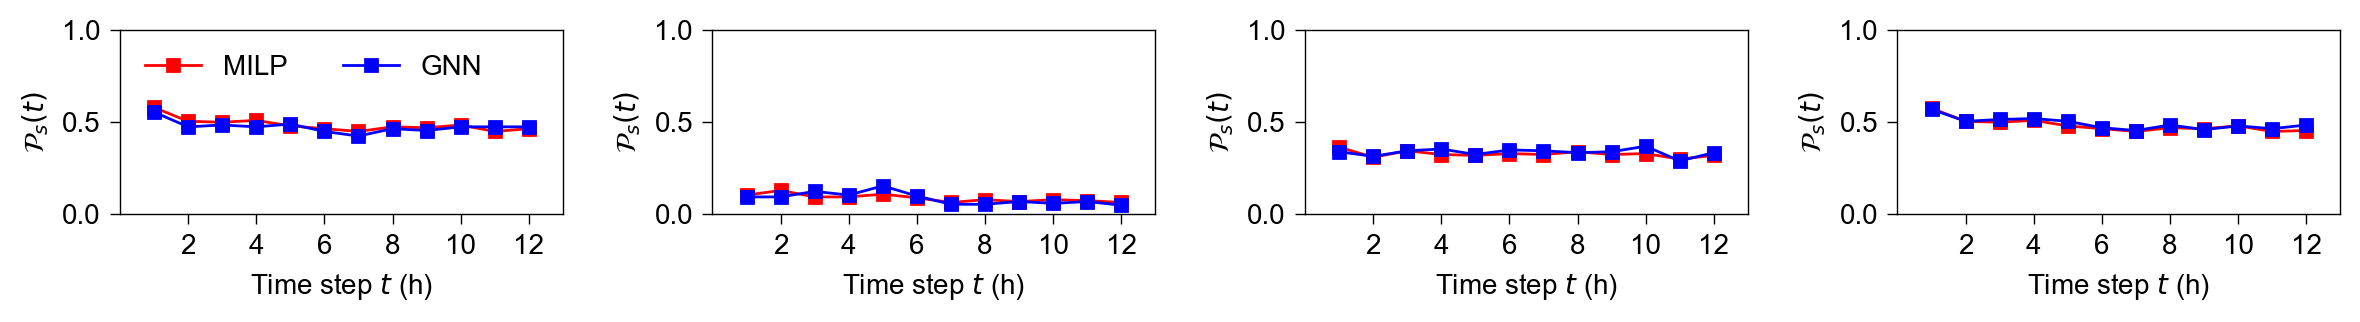

In [118]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 13)

ax = fig.add_subplot(141)
ax.plot(x, prob_true[0], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[0], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
ax.legend(loc='upper left', ncols=2, frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, prob_true[1], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[1], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, prob_true[2], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[2], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, prob_true[3], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## 2. Shedding from non-reserve constraints

In [8]:
## Read shedding in test data
shedding_zero_reserve_true = []
shedding_zero_reserve_pred = []

test_size = 200

for i in range(test_size):
    # File path
    true_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding_zero_reserve/true/true_{i+1}.csv'
    pred_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding_zero_reserve/pred/pred_{i+1}.csv'

    # Read data
    try:
        temp1 = pd.read_csv(true_path, header=None, index_col=None)
        temp2 = pd.read_csv(pred_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f'The file sample_{i+1} is not found')
        continue

    # Concatenate all data
    shedding_zero_reserve_true.append(temp1.values.copy())
    shedding_zero_reserve_pred.append(temp2.values.copy())

# Convert to numpy array and set precision
shedding_zero_reserve_true = np.abs(np.array(shedding_zero_reserve_true).astype(np.int32))
shedding_zero_reserve_pred = np.abs(np.array(shedding_zero_reserve_pred).astype(np.int32))

############################################################################
# Set prediction shreshold as 5 (prediction < 5 is considered as no shedding)
############################################################################
shedding_zero_reserve_pred[shedding_zero_reserve_pred < 5] = 0

In [9]:
# Calculate probability
prob_zero_reserve_true = np.mean((shedding_zero_reserve_true>0), axis=0)
prob_zero_reserve_pred = np.mean((shedding_zero_reserve_pred>0), axis=0)

## 3. Shedding from reserve constraints

In [10]:
# Calculate probability
prob_reserve_true = prob_true - prob_zero_reserve_true
prob_reserve_pred = prob_pred - prob_zero_reserve_pred

# Get absolute values for probability
prob_reserve_true = np.abs(prob_reserve_true)
prob_reserve_pred = np.abs(prob_reserve_pred)

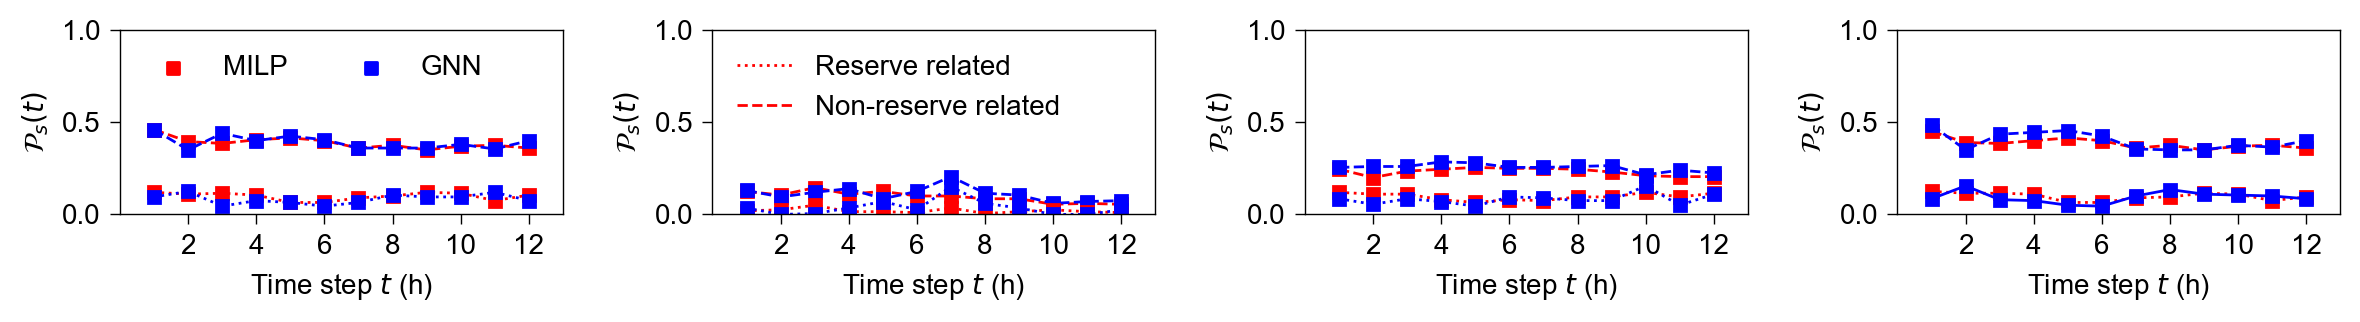

In [128]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 13)

ax = fig.add_subplot(141)
ax.plot(x, prob_zero_reserve_true[0], linestyle='dashed', color='red', marker='s', label=None)
ax.plot(x, prob_zero_reserve_pred[0], linestyle='dashed', color='blue', marker='s', label=None)
ax.plot(x, prob_reserve_true[0], linestyle='dotted', color='red', marker='s', label=None)
ax.plot(x, prob_reserve_pred[0], linestyle='dotted', color='blue', marker='s', label=None)
ax.scatter([], [], color='red', marker='s', label='MILP')
ax.scatter([], [], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
ax.legend(loc='upper left', ncols=2, frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, prob_zero_reserve_true[1], linestyle='dashed', color='red', marker='s', label=None)
ax.plot(x, prob_zero_reserve_pred[1], linestyle='dashed', color='blue', marker='s', label=None)
ax.plot(x, prob_reserve_true[1], linestyle='dotted', color='red', marker='s', label=None)
ax.plot(x, prob_reserve_pred[1], linestyle='dotted', color='blue', marker='s', label=None)
ax.plot([], [], linestyle='dotted', color='red', label='Reserve related')
ax.plot([], [], linestyle='dashed', color='red', label='Non-reserve related')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
ax.legend(loc='upper left', frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, prob_zero_reserve_true[2], linestyle='dashed', color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[2], linestyle='dashed', color='blue', marker='s', label='GNN')
ax.plot(x, prob_reserve_true[2], linestyle='dotted', color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[2], linestyle='dotted', color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, prob_zero_reserve_true[3], linestyle='dashed', color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[3], linestyle='dashed', color='blue', marker='s', label='GNN')
ax.plot(x, prob_reserve_true[3], linestyle='dotted', color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## Conditional probability
Conditional probability is defined as: $$\mathcal{P}^+_s(t) = p\left(\Psi_{t+1}>0, \, \Psi_{t+2}>0, \, \dots, \, \Psi_{T}>0|\Omega_t\right)$$

In [83]:
# Time
T = prob_true.shape[1]

# There is no conditional probability for the last time step
cond_prob_true = np.zeros((prob_true.shape[0], prob_true.shape[1]-1))
cond_prob_pred = np.zeros((prob_pred.shape[0], prob_pred.shape[1]-1))

# Calculate conditional probability ground truth
for i in range(prob_true.shape[0]):
    for j in range(prob_true.shape[1]-1):
        idx = shedding_true[:, i, j] > 0
        num = (shedding_true[idx, i, j+1:] > 0).sum(axis=1)
        cond_prob_true[i, j] = (num >= T-j-1).sum() / idx.sum()


# Calculate conditional probability prediction
for i in range(prob_pred.shape[0]):
    for j in range(prob_pred.shape[1]-1):
        idx = shedding_pred[:, i, j] > 0
        num = (shedding_pred[idx, i, j+1:] > 0).sum(axis=1)
        cond_prob_pred[i, j] = (num >= T-j-1).sum() / idx.sum()

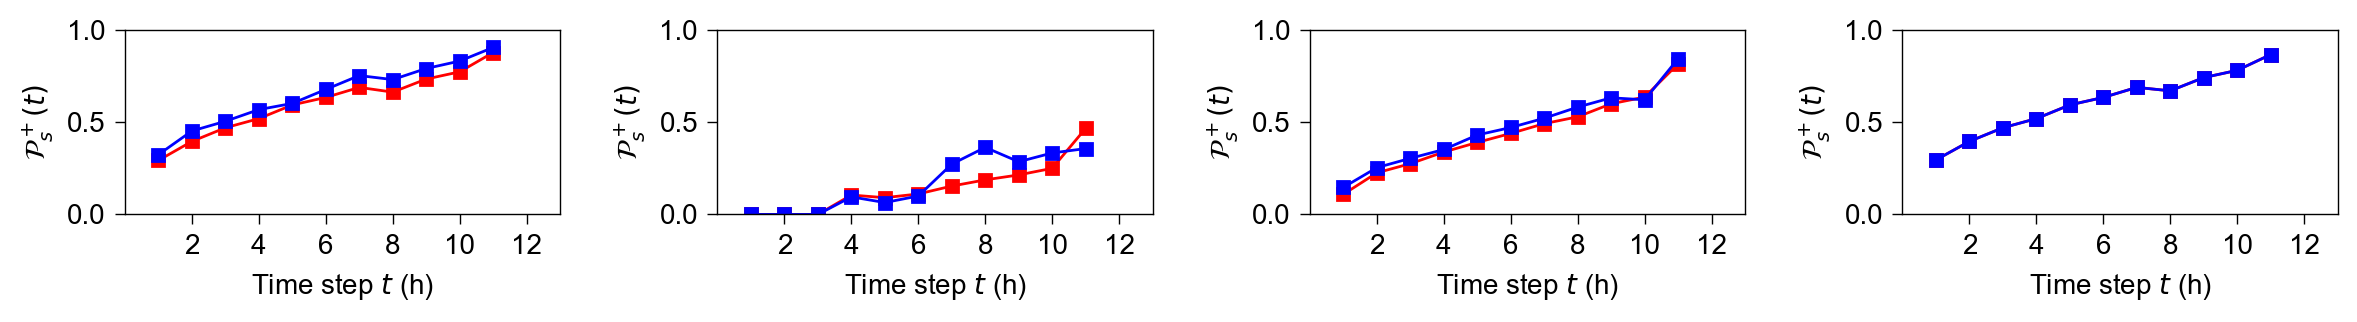

In [120]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 12)

ax = fig.add_subplot(141)
ax.plot(x, cond_prob_true[0], color='red', marker='s', label='Reserve related')
ax.plot(x, cond_prob_pred[0], color='blue', marker='s', label=None)
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper left', frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, cond_prob_true[1], color='red', marker='s', label='MILP')
ax.plot(x, cond_prob_pred[1], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, cond_prob_true[2], color='red', marker='s', label='MILP')
ax.plot(x, cond_prob_pred[2], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, cond_prob_true[3], color='red', marker='s', label='MILP')
ax.plot(x, cond_prob_true[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## Risk analysis
Risk is defined as:: $$\mathcal{R}_s(t) = \mathcal{P}_s(t) \cdot \mathcal{C}_s + \mathcal{P}^+_s(t) \cdot \left[T-t\right] \cdot \mathcal{C}_s$$

In [96]:
# Load shedding cost: system-level $10,000, zone-level $2,000
Cs = np.concatenate([np.ones((1, 12))*10000, np.ones((3, 12))*2000], axis=0)

# (T-t) matrix
arr = np.arange(11, -1, -1).reshape((1, -1))
T_minus_t = np.concatenate([arr]*4, axis=0)

# Add one column at the end of cond_prob_true and cond_prob_pred
temp_true = np.concatenate([cond_prob_true, np.zeros((4, 1))], axis=1)
temp_pred = np.concatenate([cond_prob_pred, np.zeros((4, 1))], axis=1)

# Calculate risk
risk_true = prob_true * Cs + temp_true * T_minus_t * Cs
risk_pred = prob_pred * Cs + temp_pred * T_minus_t * Cs

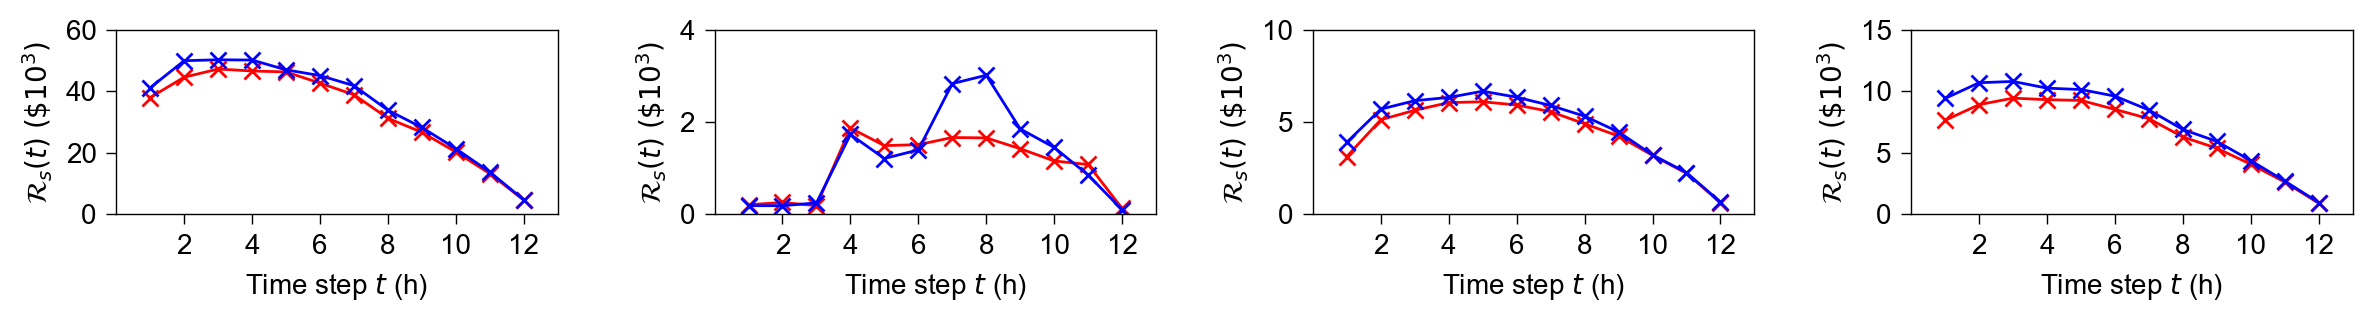

In [117]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 13)

ax = fig.add_subplot(141)
ax.plot(x, risk_true[0]/1000, color='red', marker='x', markersize=6, label='Reserve related')
ax.plot(x, risk_pred[0]/1000, color='blue', marker='x', markersize=6, label=None)
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 60))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper left', frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, risk_true[1]/1000, color='red', marker='x', markersize=6, label='MILP')
ax.plot(x, risk_pred[1]/1000, color='blue', marker='x', markersize=6, label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 4))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, risk_true[2]/1000, color='red', marker='x', markersize=6, label='MILP')
ax.plot(x, risk_pred[2]/1000, color='blue', marker='x', markersize=6, label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 10))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, risk_true[3]/1000, color='red', marker='x', markersize=6,  label='MILP')
ax.plot(x, risk_pred[3]/1000, color='blue', marker='x', markersize=6, label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 15))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')